# **PENILAIAN ESAI OTOMATIS SECARA STRUKTURAL BERBASIS SIMILARITAS POS TAGGING (Studi Kasus : Mata Pelajaran Bahasa Indonesia SMAN 1 BALONG)**

In [1]:
!pip install nltk
!pip install Sastrawi
!pip install stanza spacy-stanza




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.2/881.2 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 19.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
import string
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('punkt_tab')

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import TfidfVectorizer

import stanza
import spacy_stanza

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


# **INPUT**

## Jawaban Siswa

In [3]:
jsiswa = pd.read_csv('https://raw.githubusercontent.com/OvadillaAisyahRahma/data/refs/heads/main/bindo.csv')
jsiswa

,no_peserta,nama_siswa,soal,jawaban_siswa,kunci_jawaban,bobot_persoal,nilai
0,12-012-001,Anisha Fatma,1,Yth. Pimpinan PT. Garuda Nusantara Jalan Terat...,Yth. Direktur PT.Garuda Nusantara Jalan Terata...,30,30
1,12-012-002,Alima Nurani,1,Yth. Pimpinan PT. Garuda Nusantara Jalan Terat...,Yth. Direktur PT.Garuda Nusantara Jalan Terata...,30,30
2,12-012-003,Cherly Olivia Cahyani,1,Lampiran : satu berkas Perihal : Lamaran peker...,Yth. Direktur PT.Garuda Nusantara Jalan Terata...,30,20
3,12-012-004,Dani Maryono,1,Yang terhormat Mananger PT GARUDA NUSANTARA J...,Yth. Direktur PT.Garuda Nusantara Jalan Terata...,30,20
4,12-012-005,Dita Tiara Anggraini,1,Yth. Direktur PT. GARUDA NUSANTARA Jalan Terat...,Yth. Direktur PT.Garuda Nusantara Jalan Terata...,30,29
...,...,...,...,...,...,...,...
148,12-012-047,Reza Febri,3,1. sarjana akutansi 2. berpengalaman kerja min...,Lampiran a) Daftar Riwayat Hidup (CV) b) Ijaza...,30,10
149,12-012-048,Rizka Dwi Asrunni,3,1. Ijazah terakhir 2. Fotokopi KTP 3. Surat ke...,Lampiran a) Daftar Riwayat Hidup (CV) b) Ijaza...,30,20
150,12-012-049,Siti Nur Mari'fah,3,1. fotokopi kartu keluarga 2. fotokopi kartu t...,Lampiran a) Daftar Riwayat Hidup (CV) b) Ijaza...,30,30
151,12-012-050,Wakhibul Mustafa,3,1. sarjana akutansi 2. berpengalaman kerja min...,Lampiran a) Daftar Riwayat Hidup (CV) b) Ijaza...,30,10


In [4]:
jsiswa['kunci_jawaban'][0]

'Yth. Direktur PT.Garuda Nusantara Jalan Teratai 41 Surabaya'

# **PREPROCESSING**

## Case Folding

In [5]:
# Definisi fungsi untuk case folding dan menghilangkan tanda baca
def casefolding(jsiswa):
    jsiswa = jsiswa.apply(lambda x: x.str.lower() if x.dtype == "object" else x)
    return jsiswa

jsiswa = casefolding(jsiswa)
jsiswa

,no_peserta,nama_siswa,soal,jawaban_siswa,kunci_jawaban,bobot_persoal,nilai
0,12-012-001,anisha fatma,1,yth. pimpinan pt. garuda nusantara jalan terat...,yth. direktur pt.garuda nusantara jalan terata...,30,30
1,12-012-002,alima nurani,1,yth. pimpinan pt. garuda nusantara jalan terat...,yth. direktur pt.garuda nusantara jalan terata...,30,30
2,12-012-003,cherly olivia cahyani,1,lampiran : satu berkas perihal : lamaran peker...,yth. direktur pt.garuda nusantara jalan terata...,30,20
3,12-012-004,dani maryono,1,yang terhormat mananger pt garuda nusantara j...,yth. direktur pt.garuda nusantara jalan terata...,30,20
4,12-012-005,dita tiara anggraini,1,yth. direktur pt. garuda nusantara jalan terat...,yth. direktur pt.garuda nusantara jalan terata...,30,29
...,...,...,...,...,...,...,...
148,12-012-047,reza febri,3,1. sarjana akutansi 2. berpengalaman kerja min...,lampiran a) daftar riwayat hidup (cv) b) ijaza...,30,10
149,12-012-048,rizka dwi asrunni,3,1. ijazah terakhir 2. fotokopi ktp 3. surat ke...,lampiran a) daftar riwayat hidup (cv) b) ijaza...,30,20
150,12-012-049,siti nur mari'fah,3,1. fotokopi kartu keluarga 2. fotokopi kartu t...,lampiran a) daftar riwayat hidup (cv) b) ijaza...,30,30
151,12-012-050,wakhibul mustafa,3,1. sarjana akutansi 2. berpengalaman kerja min...,lampiran a) daftar riwayat hidup (cv) b) ijaza...,30,10


## Tokenisasi

In [6]:
def tokenisasi(jsiswa):
    # Modified to ensure all values in object columns are strings before tokenization
    for col in jsiswa.select_dtypes("object").columns:
        jsiswa[col] = jsiswa[col].astype(str).fillna('').apply(word_tokenize)
    return jsiswa

# memanggil fungsi tokenisasi
jsiswa_token = tokenisasi(jsiswa)
jsiswa_token

,no_peserta,nama_siswa,soal,jawaban_siswa,kunci_jawaban,bobot_persoal,nilai
0,[12-012-001],"[anisha, fatma]",1,"[yth, ., pimpinan, pt, ., garuda, nusantara, j...","[yth, ., direktur, pt.garuda, nusantara, jalan...",30,30
1,[12-012-002],"[alima, nurani]",1,"[yth, ., pimpinan, pt, ., garuda, nusantara, j...","[yth, ., direktur, pt.garuda, nusantara, jalan...",30,30
2,[12-012-003],"[cherly, olivia, cahyani]",1,"[lampiran, :, satu, berkas, perihal, :, lamara...","[yth, ., direktur, pt.garuda, nusantara, jalan...",30,20
3,[12-012-004],"[dani, maryono]",1,"[yang, terhormat, mananger, pt, garuda, nusant...","[yth, ., direktur, pt.garuda, nusantara, jalan...",30,20
4,[12-012-005],"[dita, tiara, anggraini]",1,"[yth, ., direktur, pt, ., garuda, nusantara, j...","[yth, ., direktur, pt.garuda, nusantara, jalan...",30,29
...,...,...,...,...,...,...,...
148,[12-012-047],"[reza, febri]",3,"[1., sarjana, akutansi, 2., berpengalaman, ker...","[lampiran, a, ), daftar, riwayat, hidup, (, cv...",30,10
149,[12-012-048],"[rizka, dwi, asrunni]",3,"[1., ijazah, terakhir, 2., fotokopi, ktp, 3., ...","[lampiran, a, ), daftar, riwayat, hidup, (, cv...",30,20
150,[12-012-049],"[siti, nur, mari'fah]",3,"[1., fotokopi, kartu, keluarga, 2., fotokopi, ...","[lampiran, a, ), daftar, riwayat, hidup, (, cv...",30,30
151,[12-012-050],"[wakhibul, mustafa]",3,"[1., sarjana, akutansi, 2., berpengalaman, ker...","[lampiran, a, ), daftar, riwayat, hidup, (, cv...",30,10


## POS Tagging

In [7]:
stanza.download('id')
nlp = spacy_stanza.load_pipeline('id')


INFO:stanza:Downloading default packages for language: id (Indonesian) ...


INFO:stanza:Finished downloading models and saved to /root/stanza_resources.
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Loading these models for language: id (Indonesian):
| Processor    | Package      |
-------------------------------
| tokenize     | gsd          |
| mwt          | gsd          |
| pos          | gsd_charlm   |
| lemma        | gsd_nocharlm |
| constituency | icon_charlm  |
| depparse     | gsd_charlm   |

INFO:stanza:Using device: cuda
INFO:stanza:Loading: tokenize
/usr/local/lib/python3.11/dist-packages/stanza/models/tokenization/trainer.py:82: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be a

In [8]:
# Fungsi POS tagging menggunakan spacy-stanza
def pos_tagging_spacy_stanza(jsiswa):
    for col in jsiswa.columns:
        if isinstance(jsiswa[col][0], list):  # Pastikan kolom adalah list token
            jsiswa[col] = jsiswa[col].apply(lambda tokens: ' '.join(tokens))  # Gabungkan token jadi string
            jsiswa[col] = jsiswa[col].apply(lambda x: [(word.text, word.pos_) for word in nlp(x)] if x else [])  # POS tagging
    return jsiswa

# Melakukan POS tagging menggunakan spacy-stanza
jsiswa_pos_tagged = pos_tagging_spacy_stanza(jsiswa_token)

jsiswa_pos_tagged

,no_peserta,nama_siswa,soal,jawaban_siswa,kunci_jawaban,bobot_persoal,nilai
0,"[(12-012-001, NUM)]","[(anisha, PROPN), (fatma, PROPN)]",1,"[(yth, PROPN), (., PUNCT), (pimpinan, NOUN), (...","[(yth, PROPN), (., PUNCT), (direktur, NOUN), (...",30,30
1,"[(12-012-002, NUM)]","[(alima, PROPN), (nurani, NOUN)]",1,"[(yth, PROPN), (., PUNCT), (pimpinan, NOUN), (...","[(yth, PROPN), (., PUNCT), (direktur, NOUN), (...",30,30
2,"[(12-012-003, NUM)]","[(cherly, PROPN), (olivia, PROPN), (cahyani, P...",1,"[(lampiran, NOUN), (:, PUNCT), (satu, NUM), (b...","[(yth, PROPN), (., PUNCT), (direktur, NOUN), (...",30,20
3,"[(12-012-004, NUM)]","[(dani, PROPN), (maryono, PROPN)]",1,"[(yang, PRON), (terhormat, ADJ), (mananger, NO...","[(yth, PROPN), (., PUNCT), (direktur, NOUN), (...",30,20
4,"[(12-012-005, NUM)]","[(dita, PROPN), (tiara, PROPN), (anggraini, PR...",1,"[(yth, PROPN), (., PUNCT), (direktur, NOUN), (...","[(yth, PROPN), (., PUNCT), (direktur, NOUN), (...",30,29
...,...,...,...,...,...,...,...
148,"[(12-012-047, NUM)]","[(reza, PROPN), (febri, PROPN)]",3,"[(1, NUM), (., PUNCT), (sarjana, NOUN), (akuta...","[(lampiran, NOUN), (a, NOUN), (), PUNCT), (daf...",30,10
149,"[(12-012-048, NUM)]","[(rizka, PROPN), (dwi, PROPN), (asrunni, PROPN)]",3,"[(1, NUM), (., PUNCT), (ijazah, NOUN), (terakh...","[(lampiran, NOUN), (a, NOUN), (), PUNCT), (daf...",30,20
150,"[(12-012-049, NUM)]","[(siti, PROPN), (nur, NOUN), (mari', NOUN), (f...",3,"[(1, NUM), (., PUNCT), (fotokopi, NOUN), (kart...","[(lampiran, NOUN), (a, NOUN), (), PUNCT), (daf...",30,30
151,"[(12-012-050, NUM)]","[(wakhibul, PROPN), (mustafa, PROPN)]",3,"[(1, NUM), (., PUNCT), (sarjana, NOUN), (akuta...","[(lampiran, NOUN), (a, NOUN), (), PUNCT), (daf...",30,10


In [9]:
#jsiswa_pos_tagged.iloc[0]
jsiswa_pos_tagged['kunci_jawaban'][0]

[('yth', 'PROPN'),
 ('.', 'PUNCT'),
 ('direktur', 'NOUN'),
 ('pt.garuda', 'PROPN'),
 ('nusantara', 'PROPN'),
 ('jalan', 'NOUN'),
 ('teratai', 'NOUN'),
 ('41', 'NUM'),
 ('surabaya', 'PROPN')]

In [10]:
import joblib
joblib.dump(jsiswa_pos_tagged, 'tagged.joblib')

['tagged.joblib']

## Stemming

In [11]:
# Inisialisasi stemmer Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi untuk melakukan stemming dengan mempertahankan tanda baca
def stemming(jsiswa):
    for col in jsiswa.columns:
        if isinstance(jsiswa[col][0], list):  # Pastikan kolom adalah list hasil POS tagging
            jsiswa[col] = jsiswa[col].apply(lambda tokens: [
                (stemmer.stem(word), pos) if word not in string.punctuation else (word, pos)
                for word, pos in tokens
            ])
    return jsiswa

# Melakukan stemming pada hasil POS tagging
jsiswa_stemmed = stemming(jsiswa_pos_tagged)
jsiswa_stemmed

,no_peserta,nama_siswa,soal,jawaban_siswa,kunci_jawaban,bobot_persoal,nilai
0,"[(12-012-001, NUM)]","[(anisha, PROPN), (fatma, PROPN)]",1,"[(yth, PROPN), (., PUNCT), (pimpin, NOUN), (pt...","[(yth, PROPN), (., PUNCT), (direktur, NOUN), (...",30,30
1,"[(12-012-002, NUM)]","[(alima, PROPN), (nurani, NOUN)]",1,"[(yth, PROPN), (., PUNCT), (pimpin, NOUN), (pt...","[(yth, PROPN), (., PUNCT), (direktur, NOUN), (...",30,30
2,"[(12-012-003, NUM)]","[(cherly, PROPN), (olivia, PROPN), (cahyani, P...",1,"[(lampir, NOUN), (:, PUNCT), (satu, NUM), (ber...","[(yth, PROPN), (., PUNCT), (direktur, NOUN), (...",30,20
3,"[(12-012-004, NUM)]","[(dan, PROPN), (maryono, PROPN)]",1,"[(yang, PRON), (hormat, ADJ), (mananger, NOUN)...","[(yth, PROPN), (., PUNCT), (direktur, NOUN), (...",30,20
4,"[(12-012-005, NUM)]","[(dita, PROPN), (tiara, PROPN), (anggraini, PR...",1,"[(yth, PROPN), (., PUNCT), (direktur, NOUN), (...","[(yth, PROPN), (., PUNCT), (direktur, NOUN), (...",30,29
...,...,...,...,...,...,...,...
148,"[(12-012-047, NUM)]","[(reza, PROPN), (febri, PROPN)]",3,"[(1, NUM), (., PUNCT), (sarjana, NOUN), (akuta...","[(lampir, NOUN), (a, NOUN), (), PUNCT), (dafta...",30,10
149,"[(12-012-048, NUM)]","[(rizka, PROPN), (dwi, PROPN), (asrunni, PROPN)]",3,"[(1, NUM), (., PUNCT), (ijazah, NOUN), (akhir,...","[(lampir, NOUN), (a, NOUN), (), PUNCT), (dafta...",30,20
150,"[(12-012-049, NUM)]","[(siti, PROPN), (nur, NOUN), (mari, NOUN), (fa...",3,"[(1, NUM), (., PUNCT), (fotokopi, NOUN), (kart...","[(lampir, NOUN), (a, NOUN), (), PUNCT), (dafta...",30,30
151,"[(12-012-050, NUM)]","[(wakhibul, PROPN), (mustafa, PROPN)]",3,"[(1, NUM), (., PUNCT), (sarjana, NOUN), (akuta...","[(lampir, NOUN), (a, NOUN), (), PUNCT), (dafta...",30,10


In [12]:
# jsiswa_stemmed['kunci_jawaban_no1']

# HANYA MENGGUNAKAN TF IDF


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Fungsi untuk menggabungkan teks setelah POS tagging dan memastikan tanda baca terpisah
def gabungkan_teks(jsiswa):
    for col in ['kunci_jawaban', 'jawaban_siswa']:  # Hanya proses kolom yang relevan
        if isinstance(jsiswa[col][0], list):  # Memastikan kolom berisi list hasil POS tagging
            jsiswa[col] = jsiswa[col].apply(lambda tokens: ' '.join([f"{word}_{pos}" for word, pos in tokens]))
    return jsiswa

# Gabungkan teks untuk setiap jawaban siswa dan kunci jawaban
jsiswa_teks = gabungkan_teks(jsiswa_stemmed)

# Inisialisasi TfidfVectorizer
vectorizer = TfidfVectorizer(token_pattern=r'\S+')  # Tokenisasi berdasarkan kata-kata non-spasi

# Menyiapkan dataframe untuk menyimpan hasil cosine similarity
cosine_similarities = []

# Loop untuk setiap baris pada dataframe dan hitung TF-IDF serta cosine similarity
for index, row in jsiswa_teks.iterrows():
    # Ambil jawaban siswa dan kunci jawaban
    jawaban_siswa = row['jawaban_siswa']
    kunci_jawaban = row['kunci_jawaban']

    # Gabungkan jawaban siswa dan kunci jawaban menjadi satu list
    tfidf_matrix = vectorizer.fit_transform([jawaban_siswa, kunci_jawaban])

    # Hitung cosine similarity antara jawaban siswa dan kunci jawaban
    cosine_sim = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])
    cosine_similarities.append(cosine_sim[0][0])  # Ambil nilai dari hasil cosine similarity

# Tambahkan hasil cosine similarity ke dataframe
jsiswa_teks['cosine_similarity'] = cosine_similarities

# Tampilkan dataframe dengan nilai cosine similarity
# print(jsiswa_teks[['kunci_jawaban', 'jawaban_siswa', 'cosine_similarity']])
rates = []
for cos_data, bbt_soal in zip(jsiswa_teks['cosine_similarity'], jsiswa_teks["bobot_persoal"]):
    rates.append(cos_data*bbt_soal)
jsiswa_teks['prediksi_nilai'] = rates
jsiswa_teks


,no_peserta,nama_siswa,soal,jawaban_siswa,kunci_jawaban,bobot_persoal,nilai,cosine_similarity,prediksi_nilai
0,"[(12-012-001, NUM)]","[(anisha, PROPN), (fatma, PROPN)]",1,yth_PROPN ._PUNCT pimpin_NOUN pt_PROPN ._PUNCT...,yth_PROPN ._PUNCT direktur_NOUN pt garuda_PROP...,30,30,0.673312,20.199355
1,"[(12-012-002, NUM)]","[(alima, PROPN), (nurani, NOUN)]",1,yth_PROPN ._PUNCT pimpin_NOUN pt_PROPN ._PUNCT...,yth_PROPN ._PUNCT direktur_NOUN pt garuda_PROP...,30,30,0.673312,20.199355
2,"[(12-012-003, NUM)]","[(cherly, PROPN), (olivia, PROPN), (cahyani, P...",1,lampir_NOUN :_PUNCT satu_NUM berkas_NOUN perih...,yth_PROPN ._PUNCT direktur_NOUN pt garuda_PROP...,30,20,0.461316,13.839476
3,"[(12-012-004, NUM)]","[(dan, PROPN), (maryono, PROPN)]",1,yang_PRON hormat_ADJ mananger_NOUN pt_PROPN ga...,yth_PROPN ._PUNCT direktur_NOUN pt garuda_PROP...,30,20,0.315785,9.473553
4,"[(12-012-005, NUM)]","[(dita, PROPN), (tiara, PROPN), (anggraini, PR...",1,yth_PROPN ._PUNCT direktur_NOUN pt_PROPN ._PUN...,yth_PROPN ._PUNCT direktur_NOUN pt garuda_PROP...,30,29,0.755791,22.673733
...,...,...,...,...,...,...,...,...,...
148,"[(12-012-047, NUM)]","[(reza, PROPN), (febri, PROPN)]",3,1_NUM ._PUNCT sarjana_NOUN akutansi_NOUN 2_NUM...,lampir_NOUN a_NOUN )_PUNCT daftar_NOUN riwayat...,30,10,0.011469,0.344066
149,"[(12-012-048, NUM)]","[(rizka, PROPN), (dwi, PROPN), (asrunni, PROPN)]",3,1_NUM ._PUNCT ijazah_NOUN akhir_ADJ 2_NUM ._PU...,lampir_NOUN a_NOUN )_PUNCT daftar_NOUN riwayat...,30,20,0.127233,3.816994
150,"[(12-012-049, NUM)]","[(siti, PROPN), (nur, NOUN), (mari, NOUN), (fa...",3,1_NUM ._PUNCT fotokopi_NOUN kartu_NOUN keluarg...,lampir_NOUN a_NOUN )_PUNCT daftar_NOUN riwayat...,30,30,0.132063,3.961883
151,"[(12-012-050, NUM)]","[(wakhibul, PROPN), (mustafa, PROPN)]",3,1_NUM ._PUNCT sarjana_NOUN akutansi_NOUN 2_NUM...,lampir_NOUN a_NOUN )_PUNCT daftar_NOUN riwayat...,30,10,0.011469,0.344066


# MAE HANYA MENGGUNAKAN TF-IDF

In [14]:
evals = []
for ntrue, npred in zip (jsiswa_teks['nilai '], jsiswa_teks['prediksi_nilai']):
    j_mae = abs(ntrue - npred)
    evals.append(j_mae)
mae = sum(evals) / len(jsiswa_teks['nilai '])
# jsiswa_stemmed['MAE'] = evals
# jsiswa_stemmed
mae

11.672817736370048

# KOMBINASI TF IDF + POS TAGGING

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Fungsi untuk menggabungkan teks setelah POS tagging dan memastikan tanda baca terpisah
def gabungkan_teks(jsiswa):
    for col in ['kunci_jawaban', 'jawaban_siswa']:  # Hanya proses kolom yang relevan
        if isinstance(jsiswa[col][0], list):  # Memastikan kolom berisi list hasil POS tagging
            jsiswa[col] = jsiswa[col].apply(lambda tokens: ' '.join([f"{word}_{pos}" for word, pos in tokens]))
    return jsiswa
bobot_pos = {
    "NOUN": 1,
    "VERB": 0.9,
    "PRON": 0.8,
    "ADJ": 0.7,
    "NUM": 0.6,
    "ADV": 0.5,
    "ADP": 0.5,
    "CONJ": 0.4,
    "DET": 0.3,
    "INTJ": 0.2,
    "PART": 0.1,
    "PUNCT": 0.1,
}

# Gabungkan teks untuk setiap jawaban siswa dan kunci jawaban
jsiswa_teks = gabungkan_teks(jsiswa_stemmed)

# Menyiapkan dataframe untuk menyimpan hasil cosine similarity
cosine_similarities = []

# Loop untuk setiap baris pada dataframe dan hitung TF-IDF serta cosine similarity
for index, row in jsiswa_teks.iterrows():
    # Ambil jawaban siswa dan kunci jawaban
    jawaban_siswa = row['jawaban_siswa']
    kunci_jawaban = row['kunci_jawaban']

    vectorizer = TfidfVectorizer(token_pattern=r'\S+')  # Tokenisasi berdasarkan kata-kata non-spasi
    # Gabungkan jawaban siswa dan kunci jawaban menjadi satu list
    tfidf_matrix = vectorizer.fit_transform([jawaban_siswa, kunci_jawaban])
    tokens = vectorizer.get_feature_names_out()
     # Konversi tfidf_matrix menjadi DataFrame
    tfidf_df_ = pd.DataFrame(tfidf_matrix.toarray(), columns=tokens)
    for term_pos in tfidf_df_.columns:
        term, pos = term_pos.rsplit('_', 1) if '_' in term_pos else (term_pos, '')
        # print(bobot_pos.get(pos.upper(), 1))
        tfidf_df_[term_pos] = tfidf_df_[term_pos] * bobot_pos.get(pos.upper(), 1)
    # print(tfidf_df_.iloc[0])
    tf_list = tfidf_df_.values
    # print(tf_list)

    # Hitung cosine similarity antara jawaban siswa dan kunci jawaban
    # cosine_sim = cosine_similarity(tf_list[0], tf_list[1])
    # Reshape array menjadi 2D (1 baris, banyak kolom)
    cosine_sim = cosine_similarity(tf_list[0].reshape(1, -1), tf_list[1].reshape(1, -1))
    cosine_similarities.append(cosine_sim[0][0])  # Ambil nilai dari hasil cosine similarity

# Tambahkan hasil cosine similarity ke dataframe
jsiswa_teks['cosine_similarity'] = cosine_similarities

# Tampilkan dataframe dengan nilai cosine similarity
# print(jsiswa_teks[['kunci_jawaban', 'jawaban_siswa', 'cosine_similarity']])
rates = []
for cos_data, bbt_soal in zip(jsiswa_teks['cosine_similarity'], jsiswa_teks["bobot_persoal"]):
    rates.append(cos_data*bbt_soal)
jsiswa_teks['prediksi_nilai'] = rates
jsiswa_teks


,no_peserta,nama_siswa,soal,jawaban_siswa,kunci_jawaban,bobot_persoal,nilai,cosine_similarity,prediksi_nilai
0,"[(12-012-001, NUM)]","[(anisha, PROPN), (fatma, PROPN)]",1,yth_PROPN ._PUNCT pimpin_NOUN pt_PROPN ._PUNCT...,yth_PROPN ._PUNCT direktur_NOUN pt garuda_PROP...,30,30,0.617281,18.518423
1,"[(12-012-002, NUM)]","[(alima, PROPN), (nurani, NOUN)]",1,yth_PROPN ._PUNCT pimpin_NOUN pt_PROPN ._PUNCT...,yth_PROPN ._PUNCT direktur_NOUN pt garuda_PROP...,30,30,0.617281,18.518423
2,"[(12-012-003, NUM)]","[(cherly, PROPN), (olivia, PROPN), (cahyani, P...",1,lampir_NOUN :_PUNCT satu_NUM berkas_NOUN perih...,yth_PROPN ._PUNCT direktur_NOUN pt garuda_PROP...,30,20,0.532134,15.964020
3,"[(12-012-004, NUM)]","[(dan, PROPN), (maryono, PROPN)]",1,yang_PRON hormat_ADJ mananger_NOUN pt_PROPN ga...,yth_PROPN ._PUNCT direktur_NOUN pt garuda_PROP...,30,20,0.351363,10.540894
4,"[(12-012-005, NUM)]","[(dita, PROPN), (tiara, PROPN), (anggraini, PR...",1,yth_PROPN ._PUNCT direktur_NOUN pt_PROPN ._PUN...,yth_PROPN ._PUNCT direktur_NOUN pt garuda_PROP...,30,29,0.787605,23.628159
...,...,...,...,...,...,...,...,...,...
148,"[(12-012-047, NUM)]","[(reza, PROPN), (febri, PROPN)]",3,1_NUM ._PUNCT sarjana_NOUN akutansi_NOUN 2_NUM...,lampir_NOUN a_NOUN )_PUNCT daftar_NOUN riwayat...,30,10,0.029912,0.897364
149,"[(12-012-048, NUM)]","[(rizka, PROPN), (dwi, PROPN), (asrunni, PROPN)]",3,1_NUM ._PUNCT ijazah_NOUN akhir_ADJ 2_NUM ._PU...,lampir_NOUN a_NOUN )_PUNCT daftar_NOUN riwayat...,30,20,0.419042,12.571266
150,"[(12-012-049, NUM)]","[(siti, PROPN), (nur, NOUN), (mari, NOUN), (fa...",3,1_NUM ._PUNCT fotokopi_NOUN kartu_NOUN keluarg...,lampir_NOUN a_NOUN )_PUNCT daftar_NOUN riwayat...,30,30,0.365603,10.968105
151,"[(12-012-050, NUM)]","[(wakhibul, PROPN), (mustafa, PROPN)]",3,1_NUM ._PUNCT sarjana_NOUN akutansi_NOUN 2_NUM...,lampir_NOUN a_NOUN )_PUNCT daftar_NOUN riwayat...,30,10,0.029912,0.897364


# MAE KOMBINASI TF-IDF + POS TAGGING


In [16]:
evals = []
for ntrue, npred in zip (jsiswa_teks['nilai '], jsiswa_teks['prediksi_nilai']):
    j_mae = abs(ntrue - npred)
    evals.append(j_mae)
mae_bobot = sum(evals) / len(jsiswa_teks['nilai '])
# jsiswa_stemmed['MAE'] = evals
# jsiswa_stemmed
mae_bobot

10.524969488184505

# Grafik Evaluasi

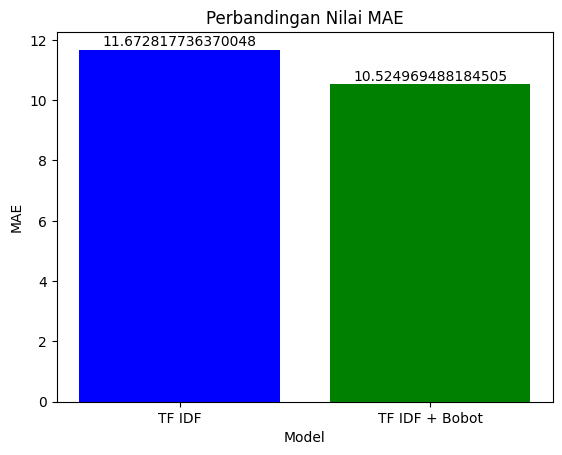

In [17]:
import matplotlib.pyplot as plt

# Nilai MAE
mae_values = [mae, mae_bobot]  # Ganti dengan nilai MAE yang Anda punya
labels = ['TF IDF', 'TF IDF + Bobot']  # Label untuk setiap model

# Membuat bar chart
plt.bar(labels, mae_values, color=['blue', 'green'])

# Menambahkan judul dan label
plt.title('Perbandingan Nilai MAE')
plt.xlabel('Model')
plt.ylabel('MAE')

# Menampilkan nilai MAE di atas setiap bar
for i, v in enumerate(mae_values):
    plt.text(i, v + 0.02, str(v), ha='center', va='bottom')

# Menampilkan grafik
plt.show()
